**Nome: Felipe Bizzo ----------------------------------- RA: 1553518**

In [ ]:
!pip install pyromat

import pyromat as pm
import numpy as np

pm.config["unit_pressure"] = "kPa"
pm.config["def_p"] = 100

mp_water = pm.get("mp.H2O") 

#Exercício 9.23

In [2]:
p1 = 10
p2 = 3500
T3 = 400 + 273.15
p4 = 400
T5 = T3

In [3]:
s1 = mp_water.ss(p=p1)[0]
T1 = mp_water.Ts(p=p1)[0]
h1 = mp_water.hs(p=p1)[0]

s2 = s1

v = 1/mp_water.ds(p=p1)[0]

w_p = v*(p2-p1)

h2 = h1+ w_p
T2 = mp_water.T_h(h=h2,p=p2)

print(f"h2 = {round(float(h2),1)} kJ/kg")
print(f"Volume específico: {round(float(v),5)} m^3/kg")
print(f"Trabalho requerido na bomba: {round(float(w_p),1)} kJ/kg")

h2 = 195.3 kJ/kg
Volume específico: 0.00101 m^3/kg
Trabalho requerido na bomba: 3.5 kJ/kg


In [4]:
h2dash = mp_water.hs(p=p2)[0]
s2dash = mp_water.ss(p=p2)[0]
T2dash = mp_water.Ts(p=p2)[0]

h3dash = mp_water.hs(p=p2)[1]
s3dash = mp_water.ss(p=p2)[1]
T3dash = T2dash

p3 = p2

h3 = mp_water.h(p=p3, T=T3)
s3 = mp_water.s(p=p3, T=T3)

s4 = s3
T4, x4 = mp_water.T_s(s=s4, p=p4, quality=True)
h4 = mp_water.h(x=x4, p=p4)

w_HPt = h3-h4

print(f"Título x4: {round(float(x4),4)}")
print(f"Trabalho gerado na turbina de alta pressão: {round(float(w_HPt),1)} kJ/kg")

Título x4: 0.9897
Trabalho gerado na turbina de alta pressão: 507.1 kJ/kg


In [5]:
p5 = p4

h5 = mp_water.h(p=p5, T=T5)
s5 = mp_water.s(p=p5, T=T5)

p6 = p1
s6 = s5

T6, x6 = mp_water.T_s(s=s6, p=p6, quality=True)
h6 = mp_water.h(x=x6, p=p6)

w_LPt = h5-h6


print(f"Título x6: {round(float(x6),4)}")
print(f"Trabalho gerado na turbina de baixa pressão: {round(float(w_LPt),1)} kJ/kg")
print(f"Trabalho total turbina: {round(float(w_HPt+w_LPt),1)} kJ/kg")

Título x6: 0.9669
Trabalho gerado na turbina de baixa pressão: 769.3 kJ/kg
Trabalho total turbina: 1276.4 kJ/kg


In [6]:
q_H = (h3-h2)+(h5-h4)
print(f"Calor gerado na caldeira: {round(float(q_H),1)} kJ/kg")

Calor gerado na caldeira: 3585.7 kJ/kg


In [7]:
q_L = h6-h1
print(f"Calor rejeitado pelo condensador: {round(float(q_L),1)} kJ/kg")

Calor rejeitado pelo condensador: 2312.8 kJ/kg


In [8]:
eta_th = (w_HPt+w_LPt-w_p)/q_H*100
print(f"A eficiência térmica é: {round(float(eta_th),1)}%")

A eficiência térmica é: 35.5%


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text([8.00032436], [318.9556078], '(6)\nT = 416.76 K\nh = 2716.1 kJ/kg \nx = 0.967')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


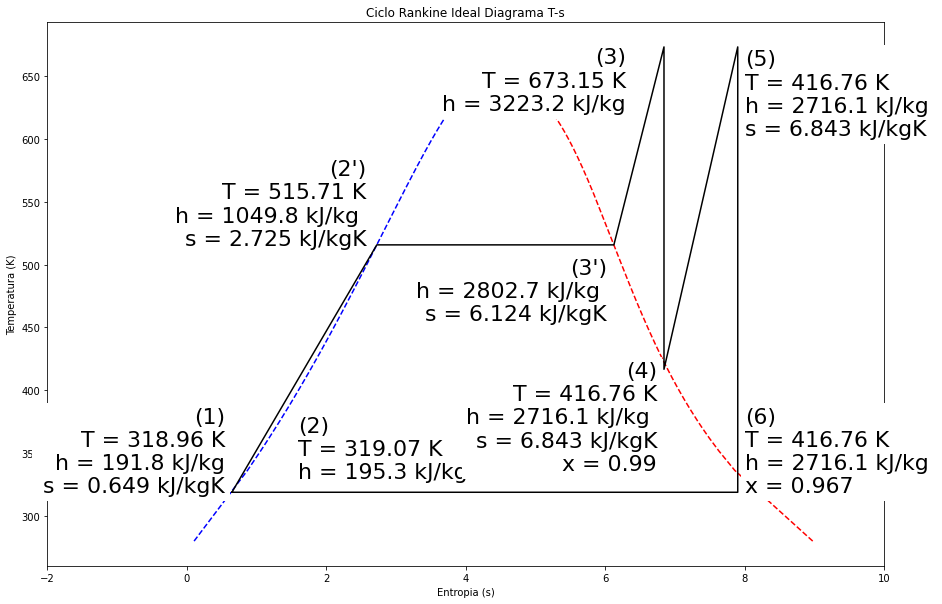

In [9]:
import matplotlib.pyplot as plt

p = np.linspace(1,22063,1000)
T = mp_water.Ts(p=p)
s = mp_water.ss(p=p)

font = {'family' : 'Times New Roman',
        'size'   : 22}

plt.figure(figsize=(15,10))
plt.title('Ciclo Rankine Ideal Diagrama T-s')
plt.rc('font', **font)
plt.plot(s[0],T, 'b--')
plt.plot(s[1],T,'r--')
plt.ylabel('Temperatura (K)')
plt.xlabel('Entropia (s)')
plt.xlim(-2,10)
#plt.ylim(200,800)
plt.plot([s1, s2, s2dash, s3dash, s3, s4, s5, s6, s1],[T1, T2, T2dash, T3dash, T3, T4, T5, T6, T1], 'black')

plt.text(s1-.1,T1,f'(1)\nT = {round(float(T1),2)} K\nh = {round(float(h1),1)} kJ/kg\n s = {round(float(s1),3)} kJ/kgK',
    ha='right',backgroundcolor='white')
plt.text(1.6,330,f'(2)\nT = {round(float(T2),2)} K\nh = {round(float(h2),1)} kJ/kg',
    ha='left',backgroundcolor='white')
plt.text(s2dash-.15,T2dash,f"(2')\nT = {round(float(T2dash),2)} K\nh = {round(float(h2dash),1)} kJ/kg \ns = {round(float(s2dash),3)} kJ/kgK",
    ha='right',backgroundcolor='white')
plt.text(s3dash-.1,T3dash-60,f"(3')\nh = {round(float(h3dash),1)} kJ/kg \ns = {round(float(s3dash),3)} kJ/kgK",
    ha='right',backgroundcolor='white')
plt.text(6.3,T3-50,f'(3)\nT = {round(float(T3),2)} K\nh = {round(float(h3),1)} kJ/kg',
    ha='right',backgroundcolor='white')
plt.text(s4-.1,T4-80,f'(4)\nT = {round(float(T4),2)} K\nh = {round(float(h4),1)} kJ/kg \ns = {round(float(s4),3)} kJ/kgK\nx = {round(float(x4),3)}',
    ha='right',backgroundcolor='white')
plt.text(s5+.1,T5-70,f'(5)\nT = {round(float(T4),2)} K\nh = {round(float(h4),1)} kJ/kg \ns = {round(float(s4),3)} kJ/kgK',
    ha='left',backgroundcolor='white')
plt.text(s6+.1,T6,f'(6)\nT = {round(float(T4),2)} K\nh = {round(float(h4),1)} kJ/kg \nx = {round(float(x6),3)}',
    ha='left',backgroundcolor='white')